In [22]:
import os
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib.image as img
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,  precision_score

# Dataset

In [23]:
# Converting all the known Images to grey images
path = 'NonExistingImages'
myList = os.listdir(path)

for i in myList:
    openedImg = Image.open(f'{path}/{i}')
    studentNames = os.path.splitext(i)[0]
    newName = studentNames + 'grey'
    openedImg = openedImg.resize((64, 64)).convert('L')
    openedImg.save('GreyedImages/' + newName + '.png')

In [24]:
# Encoding thes images array and adding them to the dataset
path = 'GreyedImages'
myList = os.listdir(path)    
images_greyed = []
count = 0 

with open(r'datasets\olivetti_X.csv', 'a', newline='') as f:
    for i in myList:
        count = count + 1
        im = img.imread(f'{path}/{i}')
        image_reshape = (im.flatten().reshape(-1, 1).T)
        writer = csv.writer(f)        
        writer.writerows(image_reshape)
        
        lastRow = pd.read_csv("datasets\olivetti_y.csv").iloc[-1][0]
        data = [str(lastRow+1)]
        with open(r'datasets\olivetti_y.csv', 'a', newline='') as file:
            writer = csv.writer(file)  
            writer.writerow(data)
file.close()
f.close()

In [25]:
# Reading the updated datasets as array
data = np.loadtxt(open("datasets\olivetti_X.csv", "rb"), delimiter=",", skiprows=1)
target = np.loadtxt(open("datasets\olivetti_Y.csv", "rb"), delimiter=",", skiprows=1)
data

array([[0.45454547, 0.47107437, 0.51239669, ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.31818181, 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       [0.19834711, 0.19421488, 0.19421488, ..., 0.75206614, 0.75206614,
        0.73966944],
       ...,
       [0.28235295, 0.2784314 , 0.27450982, ..., 0.30588236, 0.36862746,
        0.42352942],
       [0.35686275, 0.36078432, 0.3647059 , ..., 0.23921569, 0.28627452,
        0.3019608 ],
       [0.49803922, 0.49803922, 0.49411765, ..., 0.14117648, 0.15294118,
        0.15294118]])

# Data Anyalysis

In [26]:
X = data
y = target
Height = 64
Width = 64

print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("There are {} input features".format(data.shape[1]))
print("Size of each image is 64 x 64")

There are 407 images in the dataset
There are 48 unique targets in the dataset
There are 4096 input features
Size of each image is 64 x 64


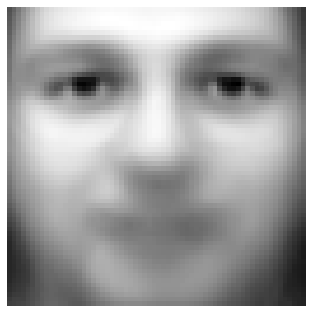

In [27]:
mean_image = np.mean(data,axis=0)
plt.figure
plt.imshow(mean_image.reshape((64,64)), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

In [28]:
def plot_gallery(images, h, w, titles=None, n_row=4, n_col=12):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if titles != None:
            plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

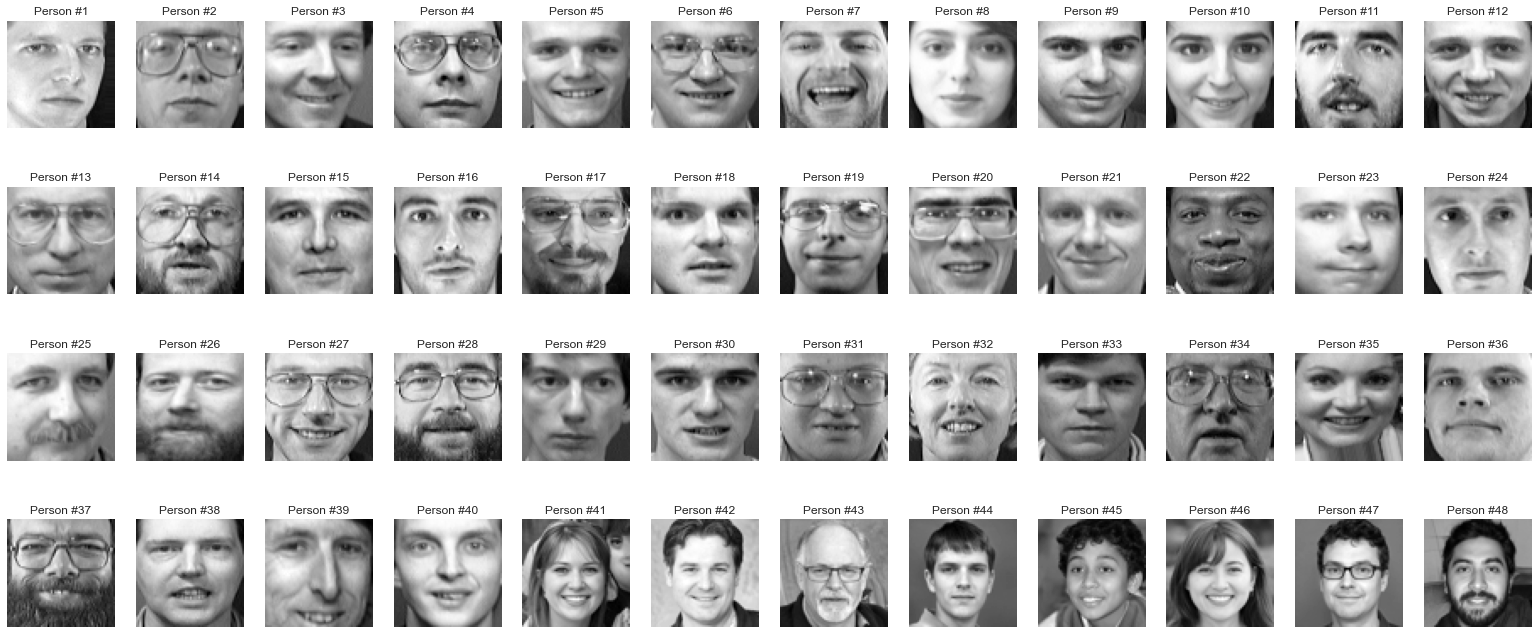

In [29]:
base = 398

Unique_faces = np.array((data[0], data[10]), dtype=float)

    
for i in range(20,400,10):
    Unique_faces = np.concatenate([Unique_faces, [data[i]]])
    
for i in range(1,9):
    Unique_faces = np.concatenate([Unique_faces, [data[base+i]]])
    
Unique_faces

titles = ['Person #'+str(i) for i in range(1,49)]

#print(titles)

plot_gallery(Unique_faces, Height, Width, titles)

# Data Pre-processing 

# Spliting Dataset

In [30]:
# Split into a training set (75%) and a test set (25%) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<AxesSubplot:title={'center':'Number of Samples for Each Classes'}, xlabel='subject ids'>

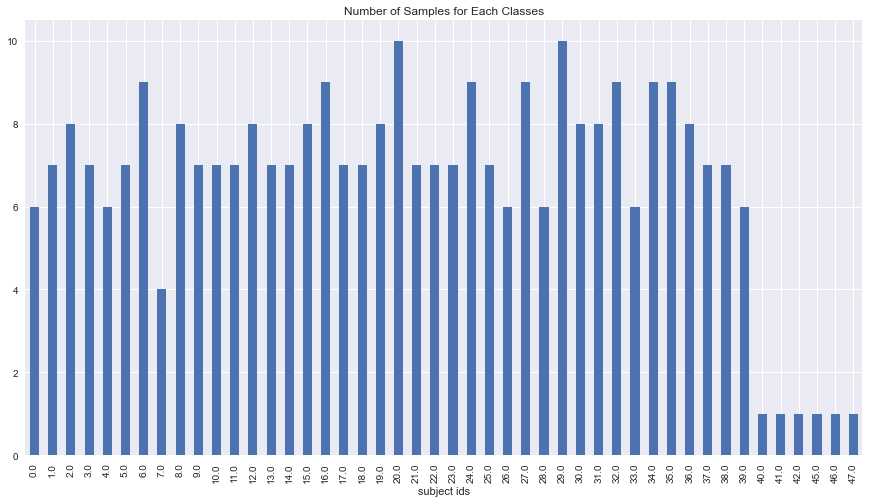

In [31]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

# PCA

In [32]:
pca = PCA(n_components=90, whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Current shape of input data matrix: ", X_train_pca.shape)

Current shape of input data matrix:  (305, 90)


# SVC

In [33]:
model = SVC(probability=True)
model.fit(X_train_pca, y_train)

SVC(probability=True)

In [34]:
accuracy = model.score(X_test_pca,y_test)
print("Testing Score = {:.3f}".format(accuracy))

Testing Score = 0.902


In [35]:
accuracy = model.score(X_train_pca,y_train)
print("Training Score = {:.3f}".format(accuracy))

Training Score = 1.000


# Confusion Matrix

In [36]:
y_test_pred = model.predict(X_test_pca)
cfm = confusion_matrix(y_test, y_test_pred)
cfm

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

C:\Users\Danyal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Danyal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Danyal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Danyal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set 

Text(0.5, 43.0, 'Predicted label\n\nAccuracy=0.9020 \nPrecision=0.9229 \nRecall=0.9020 \nF1 Score=0.9123')

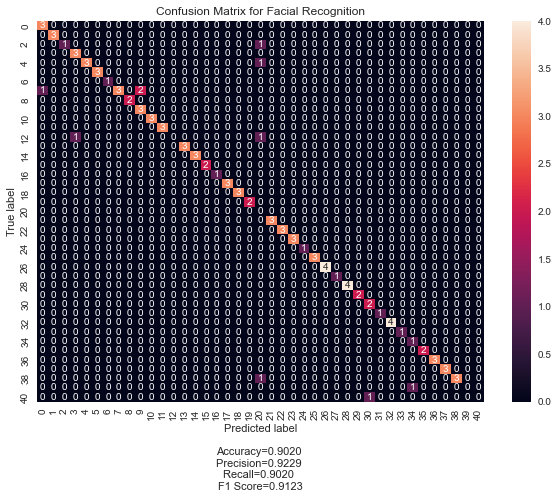

In [37]:
plt.figure(figsize = (10,7))
sns.heatmap(cfm, annot=True).set_title('Confusion Matrix for Facial Recognition')

#Calculating accuracy, precision, recall, f1 score

accuracy  = np.sum(np.equal(y_test,y_test_pred))/len(y_test)

precision = precision_score(y_test, y_test_pred, pos_label='positive', average='weighted')

recall = recall_score(y_test, y_test_pred, pos_label='positive', average='weighted')

f1_score  =  2*((precision * recall)/(precision + recall))

info = "\n\nAccuracy={:0.4f} \nPrecision={:0.4f} \nRecall={:0.4f} \nF1 Score={:0.4f}".format(
    accuracy,precision,recall,f1_score)

plt.ylabel('True label')
plt.xlabel('Predicted label' + info)

In [38]:
FP = cfm.sum(axis=0) - np.diag(cfm)  
FN = cfm.sum(axis=1) - np.diag(cfm)
TP = np.diag(cfm)
TN = cfm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
FP

C:\Users\Danyal\AppData\Local\Temp/ipykernel_11720/1266441259.py:7: RuntimeWarning: invalid value encountered in true_divide
  TPR = TP/(TP+FN)
C:\Users\Danyal\AppData\Local\Temp/ipykernel_11720/1266441259.py:11: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)
C:\Users\Danyal\AppData\Local\Temp/ipykernel_11720/1266441259.py:17: RuntimeWarning: invalid value encountered in true_divide
  FNR = FN/(TP+FN)
C:\Users\Danyal\AppData\Local\Temp/ipykernel_11720/1266441259.py:19: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/(TP+FP)


array([1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

# Evaluation Metrics

In [39]:
cReport = classification_report(y_test, y_test_pred)
print(cReport)

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         3
         1.0       1.00      1.00      1.00         3
         2.0       1.00      0.50      0.67         2
         3.0       0.75      1.00      0.86         3
         4.0       1.00      0.75      0.86         4
         5.0       1.00      1.00      1.00         3
         6.0       1.00      1.00      1.00         1
         7.0       1.00      0.50      0.67         6
         8.0       1.00      1.00      1.00         2
         9.0       0.60      1.00      0.75         3
        10.0       1.00      1.00      1.00         3
        11.0       1.00      1.00      1.00         3
        12.0       0.00      0.00      0.00         2
        13.0       1.00      1.00      1.00         3
        14.0       1.00      1.00      1.00         3
        15.0       1.00      1.00      1.00         2
        16.0       1.00      1.00      1.00         1
        17.0       1.00    

C:\Users\Danyal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Danyal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Danyal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Danyal\anaconda3\lib\site-packages\sklearn\metrics\

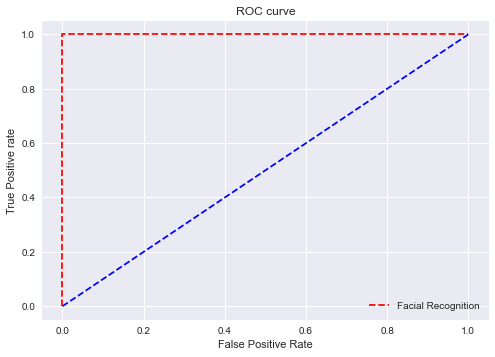

In [40]:
model.fit(X_train_pca,y_train)
pred_prob1 = model.predict_proba(X_test_pca)
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Facial Recognition')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# Coventry University Model

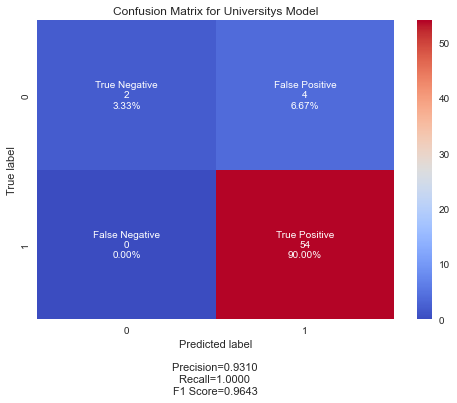

In [41]:
import numpy as np
import matplotlib.pyplot as plt 

cfm = np.reshape([2,4,0,54], (2, 2))

group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]

group_counts = ["{0:0.0f}".format(value) for value in cfm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cfm.flatten()/np.sum(cfm.flatten())]

labels = [f'{l1}\n{l2}\n{l3}' for l1, l2, l3 in zip(group_names,group_counts,group_percentages)]

labels = np.array(labels).reshape(2,2)

sns.heatmap(cfm, annot=labels, fmt='', cmap="coolwarm").set_title('Confusion Matrix for Universitys Model')

#Calculating accuracy, precision, recall, f1 score

precision = cfm[1,1] / (cfm[0,1] + cfm[1,1])
#Precision = TruePositives / (TruePositives + FalsePositives)

recall    = cfm[1,1] / (cfm[1,1] + cfm[1,0])
#Recall = TruePositives / (TruePositives + FalseNegatives)

f1_score  =  2*((precision * recall)/(precision + recall))

info = "\n\nPrecision={:0.4f} \nRecall={:0.4f} \nF1 Score={:0.4f}".format(precision,recall,f1_score)

plt.ylabel('True label')
plt.xlabel('Predicted label' + info)
plt.show()

# Resetting Datasets

In [42]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np

# Download Olivetti faces dataset
olivetti = fetch_olivetti_faces()
x = olivetti.images
y = olivetti.target

# Print info on shapes and reshape where necessary
print("Original x shape:", x.shape)
X = x.reshape((400, 4096))
print("New x shape:", X.shape)
print("y shape", y.shape)

# Save the numpy arrays
np.savetxt("datasets\olivetti_X.csv", X, delimiter = ",")
np.savetxt("datasets\olivetti_y.csv", y, delimiter = ",", fmt = '%d')

print("\nDownloading and reshaping done!")

Original x shape: (400, 64, 64)
New x shape: (400, 4096)
y shape (400,)

